In [17]:
#load data and keep the useful cols
import urllib.request  # the lib that handles the url stuff
import pandas as pd
import base64
# target_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
# x = urllib.request.urlopen(target_url) #as http response type
# data = x.read().decode('utf-8')        #to byte, then to string
# print(data,  file=open('C:con19.txt', 'w'))    #save string file
df = pd.read_csv (r'C:con19.txt')              #load txt file, to csv
df.to_csv (r'C:con19.csv', index=None)
print(df.columns)  

#only keep location,date,total_cases,total_deaths,case per million, death per million as useful cols
df.drop(df.columns[[0,11,12,13,14,15]], axis=1, inplace=True)
print('Dataset shape:',df.shape)
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')
Dataset shape: (24742, 28)


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [18]:
# add one column: days (count from dec31)
from datetime import datetime
from datetime import timedelta

df['date']= df['date'].astype('datetime64[ns]')
oldestdate = min(df['date'])
newestdate = max(df['date'])
df['days'] = (df['date'] - oldestdate).dt.days
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,days
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,1
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,2
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,3
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,4


In [46]:
df=df[df.date == '2020-06-20']
import numpy as np
df['total_cases'] = df['total_cases'].replace(np.NaN, 0)

df['total_deaths'] = df['total_deaths'].replace(np.NaN, 0)

df['total_cases_per_million'] = df['total_cases_per_million'].replace(np.NaN, 0)
df.head()
df.to_csv (r'finalcountries.csv', index=None)

In [47]:
import pandas as pd

read_file = pd.read_csv (r'finalcountries.csv')
read_file.to_excel (r'finalcountries.xlsx', index = None, header=True)

In [48]:
import pandas as pd
country = pd.read_excel('finalcountries.xlsx')
country_name = country['location']
covid_data = country[['total_cases' , 'total_deaths' , 'total_cases_per_million','total_deaths_per_million']]
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,days
162,Asia,Afghanistan,2020-06-20,27878.0,346.0,548.0,2.0,716.136,8.888,14.077,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,172
266,Europe,Albania,2020-06-20,1838.0,50.0,42.0,3.0,638.682,17.374,14.594,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,172
434,Africa,Algeria,2020-06-20,11504.0,119.0,825.0,14.0,262.343,2.714,18.814,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,172
533,Europe,Andorra,2020-06-20,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,172
624,Africa,Angola,2020-06-20,166.0,11.0,8.0,1.0,5.051,0.335,0.243,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,172


In [57]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(country[[ 'total_cases' , 'total_deaths' ,'total_cases_per_million']])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
print(df_pca.head())
df_pca = pd.concat([df_pca, country_name], axis = 1)
print(df_pca.head())

           pca1         pca2
0 -54877.484843  -558.639118
1 -80907.438883   307.716266
2 -71213.532822   671.813479
3 -81885.912449 -2629.753114
4 -82579.030812   542.600458
           pca1         pca2     location
0 -54877.484843  -558.639118  Afghanistan
1 -80907.438883   307.716266      Albania
2 -71213.532822   671.813479      Algeria
3 -81885.912449 -2629.753114      Andorra
4 -82579.030812   542.600458       Angola


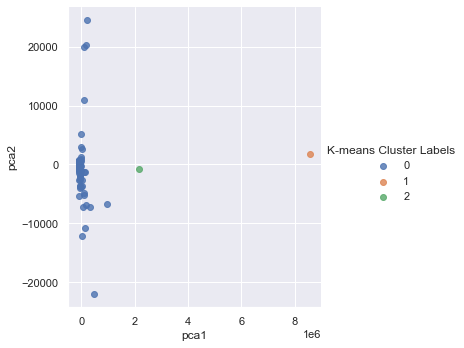

In [52]:
#kmean
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
clus = KMeans(n_clusters = 3, tol=0.004, max_iter=300)
clus.fit(df_pca[['pca1','pca2']])

df_pca['K-means Cluster Labels'] = clus.labels_
sns.lmplot(x='pca1', y='pca2',     hue="K-means Cluster Labels", data=df_pca, fit_reg=False)

In [53]:
#result
location1 = df_pca[df_pca['K-means Cluster Labels'] == 1][['location']].to_numpy()
location2 = df_pca[df_pca['K-means Cluster Labels'] == 2][['location']].to_numpy()
location0 = df_pca[df_pca['K-means Cluster Labels'] == 0][['location']].to_numpy()

print('cluster 1:',location1)
print('cluster 2:',location2)
print('cluster 0:',location0)

cluster 1: [['World']]
cluster 2: [['United States']]
cluster 0: [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['Andorra']
 ['Angola']
 ['Anguilla']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']
 ['Australia']
 ['Austria']
 ['Azerbaijan']
 ['Bahamas']
 ['Bahrain']
 ['Bangladesh']
 ['Barbados']
 ['Belarus']
 ['Belgium']
 ['Belize']
 ['Benin']
 ['Bermuda']
 ['Bhutan']
 ['Bolivia']
 ['Bonaire Sint Eustatius and Saba']
 ['Bosnia and Herzegovina']
 ['Botswana']
 ['Brazil']
 ['British Virgin Islands']
 ['Brunei']
 ['Bulgaria']
 ['Burkina Faso']
 ['Burundi']
 ['Cambodia']
 ['Cameroon']
 ['Canada']
 ['Cape Verde']
 ['Cayman Islands']
 ['Central African Republic']
 ['Chad']
 ['Chile']
 ['China']
 ['Colombia']
 ['Comoros']
 ['Congo']
 ['Costa Rica']
 ["Cote d'Ivoire"]
 ['Croatia']
 ['Cuba']
 ['Curacao']
 ['Cyprus']
 ['Czech Republic']
 ['Democratic Republic of Congo']
 ['Denmark']
 ['Djibouti']
 ['Dominica']
 ['Dominican Republic']
 ['Ecuador']
 ['Egypt']
 ['El Salvador']
 ['Equa

In [58]:
country_name

0         Afghanistan
1             Albania
2             Algeria
3             Andorra
4              Angola
            ...      
201    Western Sahara
202             Yemen
203            Zambia
204          Zimbabwe
205             World
Name: location, Length: 206, dtype: object

In [60]:
location2

array([['United States']], dtype=object)